In [1]:
import wandb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
api = wandb.Api(timeout=600)
entity, project = 'autoconvnext', 'rainbow'
runs = api.runs(entity + '/' + project)

In [44]:
summary_list, config_list, name_list = [], [], []
network_archs = []
resolution = []
grad_clip = []
spectral_norm = []
history = []
run_ids = []
env_name = []
for run in runs:
    if run.config['resolution'] is None:
        print(run.name)
        continue
        
    summary_list.append(run.summary._json_dict)
    config_list.append({k: v for k,v in run.config.items() if not k.startswith('_')})
    network_archs.append(run.config['network_arch'])
    resolution.append(run.config['resolution'][0])
    grad_clip.append(run.config['max_grad_norm'])
    spectral_norm.append(run.config['spectral_norm'])
    name_list.append(run.name)
    run_ids.append(run.id)
    env_name.append(run.config['env_name'])

prime-serenity-252
autumn-sunset-251
silvery-rain-250
treasured-plasma-34
upbeat-wood-33
sleek-hill-32
confused-snow-31
radiant-grass-30
ethereal-morning-29


In [4]:
cmap = sns.color_palette("husl", 15)

In [5]:
runs_df = pd.DataFrame({"summary":summary_list, "network_arch": network_archs, "resolution": resolution, 
                        "grad_clip": grad_clip, "spectral_norm":spectral_norm, "name": name_list, "run_id": run_ids, 'env_name': env_name})

In [6]:
runs_df = runs_df[runs_df['env_name'] == 'gym:Qbert']

In [7]:
baseline = runs_df[runs_df['network_arch'] == 'impala_large:2']
# baseline = runs_df[runs_df['resolution'] == 84]
# baseline = runs_df[runs_df['grad_clip'] == 10]
# baseline = runs_df[runs_df['spectral_norm'] == True]

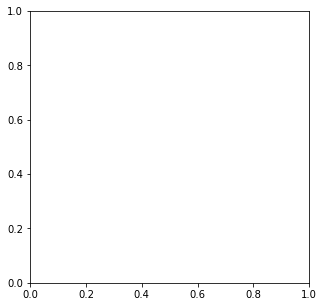

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

In [33]:
history_frames = []
history_running_avg_reward = []
for run_id in baseline['run_id']:

    run = api.run(entity + '/' + project + '/' + run_id)
    history = run.history()
    try:
        if history['x/game_frame'].to_list()[-1] < 800000:
            continue 
        history_frames += history['x/game_frame'].to_list()
        print(len(history_frames))
        history_running_avg_reward += history['running_avg_return'].to_list()
        print(len(history_running_avg_reward))
        print(run.name)
    except:
        print("No history for run_id: ", run_id, run.name)
        continue
# print(history_frames)
# print(history_running_avg_reward)
sns.regplot(x=history_frames, y=history_running_avg_reward, order=10, ci=99, scatter=False,
                label=f'ImaplaLarge:2 (Baseline)', ax=ax)

No history for run_id:  29y5qdvt good-universe-236
No history for run_id:  1tkrij3q wise-aardvark-227
No history for run_id:  2hm07n0m pleasant-universe-221
No history for run_id:  1ncbd6gy silver-disco-220
No history for run_id:  1m1f1zos exalted-frost-219
No history for run_id:  foffg9d5 divine-aardvark-218
No history for run_id:  3ty0en2n giddy-snowflake-217
No history for run_id:  106ngao7 restful-leaf-216
No history for run_id:  37ysi99n pious-frost-215
506
506
chocolate-paper-187
1019
1019
revived-snowflake-186
1536
1536
devoted-hill-185
No history for run_id:  3mzieinq vocal-plant-113
No history for run_id:  34h8zwsk soft-bush-112
No history for run_id:  211xa2o7 revived-wave-111
No history for run_id:  39e1m0qh glorious-forest-96
No history for run_id:  31ig10uw playful-feather-95
No history for run_id:  17ss4qyx icy-oath-94
No history for run_id:  1bdvfh12 prime-deluge-93
No history for run_id:  2fitk32w visionary-voice-92
No history for run_id:  2mwkivbw neat-dream-90
No hist

<AxesSubplot:>

In [34]:
i = 0
# for network_arch_name, arch_group_df in runs_df.groupby('network_arch'):
arch_group_df = runs_df[runs_df['network_arch'] == 'convnext_atto']
for resolution_name, resolution_group_df in arch_group_df.groupby('resolution'):
    print(resolution_name)
    # print(resolution_group_df[['grad_clip', 'spectral_norm', 'name']])

    for grad_clip_name, grad_clip_group_df in resolution_group_df.groupby('grad_clip'):
        print(grad_clip_name)
        # print(grad_clip_group_df[['spectral_norm', 'name']])

        for spectral_norm_name, spectral_norm_group_df in grad_clip_group_df.groupby('spectral_norm'):
            print(spectral_norm_name)
            # print(spectral_norm_group_df[['name']])
            
            history_frames = []
            history_running_avg_reward = []
            for run_id in spectral_norm_group_df['run_id']:

                run = api.run(entity + '/' + project + '/' + run_id)
                if run.config['lr'] != 0.00025 or run.config['train_count'] != 2:
                    print('Skipping run: ', run.name, run.config['lr'], run.config['train_count'])
                    continue
                history = run.history()
                try:
                    if history['x/game_frame'].to_list()[-1] < 500000:
                        continue 
                    history_frames += history['x/game_frame'].to_list()
                    print(len(history_frames))
                    history_running_avg_reward += history['running_avg_return'].to_list()
                    print(len(history_running_avg_reward))
                    print(run.name)
                except:
                    print("No history for run_id: ", run_id, run.name)
                    continue
            # print(history_frames)
            # print(history_running_avg_reward)
            sns.regplot(x=history_frames, y=history_running_avg_reward, order=10, ci=99, scatter=False,
                            label=f'Resolution: {resolution_name} Clip:{grad_clip_name} Spec.Norm:{spectral_norm_name}', ax=ax)
            i += 1
                # sns.lineplot(x=history_frames, y=history_running_avg_reward)


140
0.1
none
Skipping run:  dauntless-dragon-249 2.5e-06 2
Skipping run:  usual-breeze-248 2.5e-06 2
Skipping run:  golden-firefly-247 2.5e-06 2
Skipping run:  elated-silence-246 2.5e-05 2
Skipping run:  feasible-leaf-245 2.5e-05 2
Skipping run:  dulcet-cloud-244 2.5e-05 2
Skipping run:  revived-aardvark-243 0.025 2
Skipping run:  wild-thunder-242 0.025 2
Skipping run:  drawn-jazz-241 0.025 2
Skipping run:  dutiful-puddle-240 0.0025 2
Skipping run:  restful-pond-239 0.0025 2
Skipping run:  unique-leaf-238 0.0025 2
501
501
eager-gorge-168
986
986
revived-universe-166
1467
1467
denim-glade-169
10.0
all
505
505
comfy-butterfly-172
936
936
soft-flower-171
1504
1504
crimson-disco-170
1970
1970
summer-frost-158
2466
2466
fresh-field-157
3012
3012
splendid-breeze-156
none
513
513
driven-serenity-149
989
989
noble-voice-148
1445
1445
bumbling-universe-147
1941
1941
worldly-fire-139
2449
2449
zany-night-140
2995
2995
devout-dew-138
144
0.1
none
467
467
copper-fire-167
956
956
avid-valley-165
14

In [35]:
fig.legend(loc = 2, bbox_to_anchor = (1,0.75))
ax.set_xlabel('Frame')
ax.set_ylabel('Return')
# ax.set_title('Comparison of different architectures, gradient clipping and spectral normalization')
fig.savefig('comp1.png', dpi=600, bbox_inches='tight')
fig.savefig('comp1.pdf', bbox_inches='tight')
fig.show()

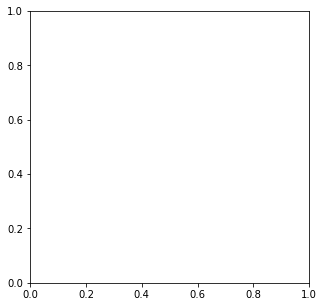

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

In [21]:
history_frames = []
history_running_avg_reward = []
for run_id in baseline['run_id']:

    run = api.run(entity + '/' + project + '/' + run_id)
    history = run.history()
    try:
        if history['x/game_frame'].to_list()[-1] < 800000:
            continue 
        history_frames += history['x/game_frame'].to_list()
        print(len(history_frames))
        history_running_avg_reward += history['running_avg_return'].to_list()
        print(len(history_running_avg_reward))
        print(run.name)
    except:
        print("No history for run_id: ", run_id, run.name)
        continue
# print(history_frames)
# print(history_running_avg_reward)
sns.regplot(x=history_frames, y=history_running_avg_reward, order=10, ci=99, scatter=False,
                label=f'ImaplaLarge:2 (Baseline)', ax=ax)

No history for run_id:  29y5qdvt good-universe-236
No history for run_id:  1tkrij3q wise-aardvark-227
No history for run_id:  2hm07n0m pleasant-universe-221
No history for run_id:  1ncbd6gy silver-disco-220
No history for run_id:  1m1f1zos exalted-frost-219
No history for run_id:  foffg9d5 divine-aardvark-218
No history for run_id:  3ty0en2n giddy-snowflake-217
No history for run_id:  106ngao7 restful-leaf-216
No history for run_id:  37ysi99n pious-frost-215
510
510
chocolate-paper-187
998
998
revived-snowflake-186
1502
1502
devoted-hill-185
No history for run_id:  3mzieinq vocal-plant-113
No history for run_id:  34h8zwsk soft-bush-112
No history for run_id:  211xa2o7 revived-wave-111
No history for run_id:  39e1m0qh glorious-forest-96
No history for run_id:  31ig10uw playful-feather-95
No history for run_id:  17ss4qyx icy-oath-94
No history for run_id:  1bdvfh12 prime-deluge-93
No history for run_id:  2fitk32w visionary-voice-92
No history for run_id:  2mwkivbw neat-dream-90
No histor

<AxesSubplot:>

In [22]:
i = 0
# for network_arch_name, arch_group_df in runs_df.groupby('network_arch'):
correct_netwokrs = runs_df[(runs_df['network_arch'] == 'convnext_impala:2') | (runs_df['network_arch'] == 'convnext_impala:1')]
for arch_group_name, arch_group_df in correct_netwokrs.groupby('network_arch'):

    for resolution_name, resolution_group_df in arch_group_df.groupby('resolution'):
        print(resolution_name)
        # print(resolution_group_df[['grad_clip', 'spectral_norm', 'name']])

        for grad_clip_name, grad_clip_group_df in resolution_group_df.groupby('grad_clip'):
            print(grad_clip_name)
            # print(grad_clip_group_df[['spectral_norm', 'name']])

            for spectral_norm_name, spectral_norm_group_df in grad_clip_group_df.groupby('spectral_norm'):
                print(spectral_norm_name)
                # print(spectral_norm_group_df[['name']])
                
                history_frames = []
                history_running_avg_reward = []
                for run_id in spectral_norm_group_df['run_id']:

                    run = api.run(entity + '/' + project + '/' + run_id)
                    history = run.history()
                    try:
                        if history['x/game_frame'].to_list()[-1] < 500000:
                            continue 
                        history_frames += history['x/game_frame'].to_list()
                        print(len(history_frames))
                        history_running_avg_reward += history['running_avg_return'].to_list()
                        print(len(history_running_avg_reward))
                        print(run.name)
                    except:
                        print("No history for run_id: ", run_id, run.name)
                        continue
                # print(history_frames)
                # print(history_running_avg_reward)
                sns.regplot(x=history_frames, y=history_running_avg_reward, order=10, ci=99, scatter=False,
                                label=f'{arch_group_name} Resolution: {resolution_name} Clip:{grad_clip_name} Spec.Norm:{spectral_norm_name}', ax=ax)
                i += 1
                    # sns.lineplot(x=history_frames, y=history_running_avg_reward)


84
10.0
none
518
518
warm-eon-196
1000
1000
expert-bee-194
1488
1488
stilted-wildflower-195
No history for run_id:  3op334g5 denim-haze-192
No history for run_id:  215tfjrb fast-armadillo-193
No history for run_id:  16f9336d snowy-deluge-191
No history for run_id:  3j3rwo4r revived-wildflower-190
No history for run_id:  2tu3kzpp dashing-frost-188
No history for run_id:  151u59t3 cosmic-eon-188
84
10.0
none
497
497
trim-mountain-201
999
999
scarlet-wind-202
1483
1483
valiant-bee-200
No history for run_id:  364l844e honest-flower-199
No history for run_id:  3g0g2ryh ethereal-sound-198
No history for run_id:  3bn0zicl denim-waterfall-197


In [15]:
runs_df['network_arch'].unique()

array(['impalanextv10_large:2', 'impalanextv7_large:2',
       'impalanextv8_large:2', 'impalanextv9_large:2',
       'impalanextv3_large:2', 'impalanextv6_large:2',
       'impalanextv4_large:2', 'impalanextv5_large:2',
       'impalanextv2_large:2', 'convnext_atto', 'impala_large:2',
       'convnext_impala:4', 'convnext_impala:2', 'convnext_impala:1',
       'impalanext_large:1', 'impalanext_large:2', 'nature'], dtype=object)

In [23]:
fig.legend(loc = 2, bbox_to_anchor = (1,0.75))
ax.set_xlabel('Frame')
ax.set_ylabel('Return')
# ax.set_title('Comparison of different architectures, gradient clipping and spectral normalization')
fig.savefig('comp2.png', dpi=600, bbox_inches='tight')
fig.savefig('comp2.pdf', bbox_inches='tight')
fig.show()

84
10.0
all
511
511
vague-monkey-235
1035
1035
devoted-forest-234
1562
1562
silvery-pyramid-233
No history for run_id:  2b50twtw pleasant-violet-231
No history for run_id:  2znlewdi hardy-bush-230
No history for run_id:  1vhgkc0f icy-dragon-229
No history for run_id:  pfekpfki vital-durian-228
none
463
463
misunderstood-vortex-258
939
939
sunny-frost-256
1432
1432
proud-meadow-257
84
10.0
all
481
481
wild-sun-277
1000
1000
snowy-planet-276
1488
1488
quiet-wildflower-275
none
506
506
giddy-star-271
982
982
dulcet-energy-270
1515
1515
splendid-breeze-269
84
10.0
none
498
498
valiant-disco-268
1006
1006
crisp-totem-267
1493
1493
curious-sound-266
84
10.0
none
497
497
curious-durian-265
969
969
still-universe-264
1462
1462
honest-sunset-263
84
10.0
all
510
510
peach-eon-274
1016
1016
sweet-sponge-273
1524
1524
denim-monkey-272
84
10.0
all
484
484
still-voice-288
1005
1005
ethereal-breeze-287
1475
1475
fanciful-wind-286
84
10.0
all
519
519
vague-plant-285
988
988
fine-glitter-284
1484
1484


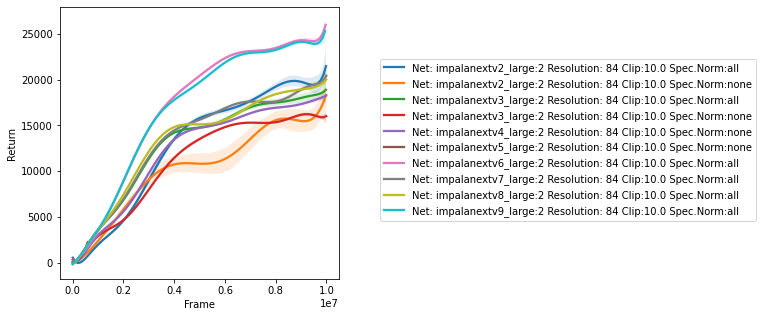

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
history_frames = []
history_running_avg_reward = []
# for run_id in baseline['run_id']:

#     run = api.run(entity + '/' + project + '/' + run_id)
#     history = run.history()
#     try:
#         if history['x/game_frame'].to_list()[-1] < 800000:
#             continue 
#         history_frames += history['x/game_frame'].to_list()
#         print(len(history_frames))
#         history_running_avg_reward += history['running_avg_return'].to_list()
#         print(len(history_running_avg_reward))
#         print(run.name)
#     except:
#         print("No history for run_id: ", run_id, run.name)
#         continue
# # print(history_frames)
# # print(history_running_avg_reward)
# sns.regplot(x=history_frames, y=history_running_avg_reward, order=10, ci=99, scatter=False,
#                 label=f'ImaplaLarge:2 (Baseline)', ax=ax)
i = 0
# for network_arch_name, arch_group_df in runs_df.groupby('network_arch'):
correct_networks = runs_df[(runs_df['network_arch'] == 'impalanextv2_large:2') |
                            (runs_df['network_arch'] == 'impalanextv3_large:2') | (runs_df['network_arch'] == 'impalanextv4_large:2') |
                            (runs_df['network_arch'] == 'impalanextv5_large:2') | (runs_df['network_arch'] == 'impalanextv6_large:2') |
                            (runs_df['network_arch'] == 'impalanextv7_large:2') | (runs_df['network_arch'] == 'impalanextv8_large:2') |
                            (runs_df['network_arch'] == 'impalanextv9_large:2')]
for arch_group_name, arch_group_df in correct_networks.groupby('network_arch'):
    for resolution_name, resolution_group_df in arch_group_df.groupby('resolution'):
        print(resolution_name)
        # print(resolution_group_df[['grad_clip', 'spectral_norm', 'name']])

        for grad_clip_name, grad_clip_group_df in resolution_group_df.groupby('grad_clip'):
            print(grad_clip_name)
            # print(grad_clip_group_df[['spectral_norm', 'name']])

            for spectral_norm_name, spectral_norm_group_df in grad_clip_group_df.groupby('spectral_norm'):
                print(spectral_norm_name)
                # print(spectral_norm_group_df[['name']])
                
                history_frames = []
                history_running_avg_reward = []
                for run_id in spectral_norm_group_df['run_id']:

                    run = api.run(entity + '/' + project + '/' + run_id)
                    history = run.history()
                    try:
                        if history['x/game_frame'].to_list()[-1] < 500000:
                            continue 
                        history_frames += history['x/game_frame'].to_list()
                        print(len(history_frames))
                        history_running_avg_reward += history['running_avg_return'].to_list()
                        print(len(history_running_avg_reward))
                        print(run.name)
                    except:
                        print("No history for run_id: ", run_id, run.name)
                        continue
                # print(history_frames)
                # print(history_running_avg_reward)
                sns.regplot(x=history_frames, y=history_running_avg_reward, order=10, ci=99, scatter=False,
                                label=f'Net: {arch_group_name} Resolution: {resolution_name} Clip:{grad_clip_name} Spec.Norm:{spectral_norm_name}', ax=ax)
    
                i += 1
                # sns.lineplot(x=history_frames, y=history_running_avg_reward)
fig.legend(loc = 2, bbox_to_anchor = (1,0.75))
ax.set_xlabel('Frame')
ax.set_ylabel('Return')
# ax.set_title('Comparison of different architectures, gradient clipping and spectral normalization')
fig.savefig('comp_impalanext.png', dpi=600, bbox_inches='tight')
fig.savefig('comp_impalanext.pdf', bbox_inches='tight')
fig.show()

In [18]:
correct_networks = runs_df[(runs_df['network_arch'] == 'impalanext_large:2') | (runs_df['network_arch'] == 'impalanextv2_large:2') |
                            (runs_df['network_arch'] == 'impalanextv3_large:2') | (runs_df['network_arch'] == 'impalanextv4_large:2') |
                            (runs_df['network_arch'] == 'impalanextv5_large:2') | (runs_df['network_arch'] == 'impalanextv6_large:2') |
                            (runs_df['network_arch'] == 'impalanextv7_large:2') | (runs_df['network_arch'] == 'impalanextv8_large:2') |
                            (runs_df['network_arch'] == 'impalanextv9_large:2')]
correct_networks.groupby('network_arch')

492
492
eternal-wildflower-253
1001
1001
stellar-serenity-254
1509
1509
divine-durian-255


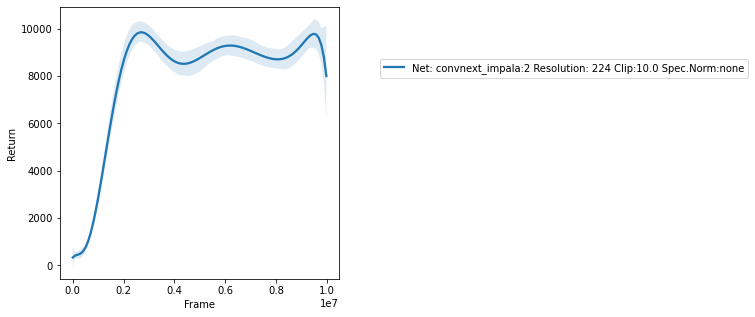

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
history_frames = []
history_running_avg_reward = []
# for run_id in baseline['run_id']:

#     run = api.run(entity + '/' + project + '/' + run_id)
#     history = run.history()
#     try:
#         if history['x/game_frame'].to_list()[-1] < 800000:
#             continue 
#         history_frames += history['x/game_frame'].to_list()
#         print(len(history_frames))
#         history_running_avg_reward += history['running_avg_return'].to_list()
#         print(len(history_running_avg_reward))
#         print(run.name)
#     except:
#         print("No history for run_id: ", run_id, run.name)
#         continue
# # print(history_frames)
# # print(history_running_avg_reward)
# sns.regplot(x=history_frames, y=history_running_avg_reward, order=10, ci=99, scatter=False,
#                 label=f'ImaplaLarge:2 (Baseline)', ax=ax)
i = 0
# for network_arch_name, arch_group_df in runs_df.groupby('network_arch'):

history_frames = []
history_running_avg_reward = []
for run_id in ['hx12ffh0', '1vsd51qh', '3on3fvf2']:

    run = api.run(entity + '/' + project + '/' + run_id)
    history = run.history()
    try:
        if history['x/game_frame'].to_list()[-1] < 500000:
            continue 
        history_frames += history['x/game_frame'].to_list()
        print(len(history_frames))
        history_running_avg_reward += history['running_avg_return'].to_list()
        print(len(history_running_avg_reward))
        print(run.name)
    except:
        print("No history for run_id: ", run_id, run.name)
        continue
# print(history_frames)
# print(history_running_avg_reward)
sns.regplot(x=history_frames, y=history_running_avg_reward, order=10, ci=99, scatter=False,
                label=f'Net: {arch_group_name} Resolution: {resolution_name} Clip:{grad_clip_name} Spec.Norm:{spectral_norm_name}', ax=ax)

i += 1
                # sns.lineplot(x=history_frames, y=history_running_avg_reward)
fig.legend(loc = 2, bbox_to_anchor = (1,0.75))
ax.set_xlabel('Frame')
ax.set_ylabel('Return')
# ax.set_title('Comparison of different architectures, gradient clipping and spectral normalization')
fig.savefig('comp_impalanext.png', dpi=600, bbox_inches='tight')
fig.savefig('comp_impalanext.pdf', bbox_inches='tight')
fig.show()

In [45]:
runs_df['env_name'].unique()

array(['gym:Qbert'], dtype=object)